### Imports

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Odds & log(odds)

1. Odds are something that my team winning divided by my team not winning
2. It is not probability
    - Probability is something that my team winning divided by total number of winning & losing
3. The odds can also be calculated from the probability
    - ratio of probability of winning to probability of not winning
4. It will be calculated from counts and probabilities
5. The odds of losing will be between 0 and 1 but the odds of winning will be between 0 and positive infinity

**Hence log will be applied on the odds value to achieve symmetry on both sides**

### Logistic Regression

1. It is similar to linear regression
2. It is something that predicts the values which are discrete values
3. It is known be the classification algorithm
4. It will draw a curve in 'S' shape
5. The 'S' Shape tells us the probability and the probability decides which class it belongs to

### Example

1. Lets imagine we are having a mice weight and its corresponding obesity (Obese or Not)
2. ![Logistic Regression Curve](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSd7PCiRELYCkmsPsw78RKybc9SWbXvukRsJA&s)
3. The weight will be on x-axis and the output(obese or not) in y-axis
4. When a weight is give, the corresponding y-axis value is seen and checks if it comes below 50% or above 50% of the curve
5. Based on the probility the output is determined

### Difference between Linear & Logistic Regression

1. There won't be optimal fit line instead it will be of S shape
2. The R2 value is calculated by maximum likelihood
3. There wont be RSS calculation in Logistic Regression
4. The curve with the maximum likelihood value is selected as the optimal curve
5. The likelihood is nothing but it will fit the curve and calculates the probability

### Implementation

In [6]:
iris = load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
iris.data.shape

(150, 4)

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris_train = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_test = pd.DataFrame(data=iris.target, columns=["species"])

In [13]:
iris_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
iris_test.head()

,species
0,0
1,0
2,0
3,0
4,0


### Visualize the Data

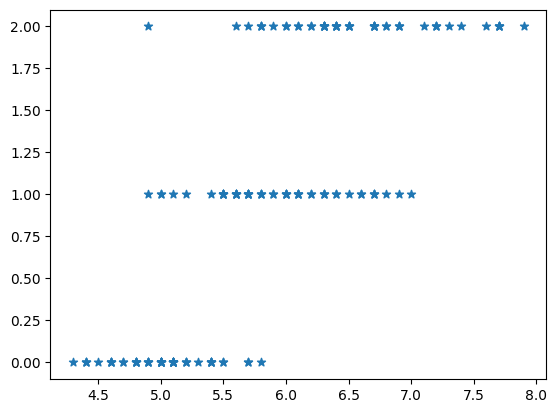

In [15]:
plt.scatter(iris_train[["sepal length (cm)"]], iris_test[["species"]], marker='*')

In [16]:
combined = pd.concat([iris_train, iris_test], axis=1)

In [17]:
species2 = combined[combined["species"] == 0]
species2["sepal length (cm)"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3])

<Axes: xlabel='sepal length (cm)', ylabel='species'>

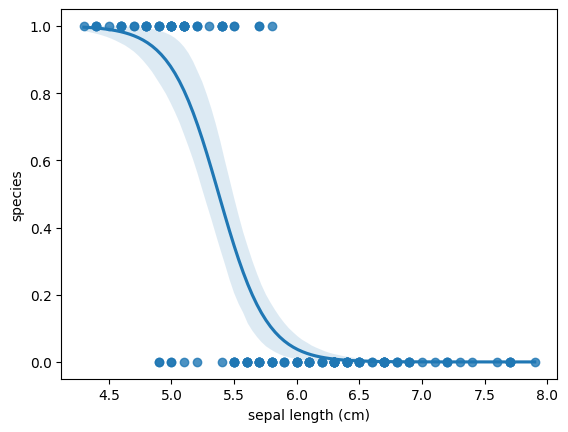

In [18]:
sns.regplot(x=iris_train["sepal length (cm)"], y=iris_test["species"].eq(0), logistic=True)

### Split the dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris_train, iris_test)

In [20]:
iris_reg = LogisticRegression(random_state=5)
iris_reg.fit(X_train, y_train)

C:\Users\Dell\PycharmProjects\practice-ml\venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=5)

In [21]:
y_pred = iris_reg.predict(X_test)

### Coefficients

1. The y-axis which will have 0, 1 or 2 will be replaced with the new y-axis that contain the log(odds)
2. Hence the squiggly line will be transformed into a straight line by transforming it into log(odds)
3. The equation in the straight line represent the new y-axis
4. The way of determinging coefficients is similar to the linear regression
5. Unfortunately, its because of the values that are confined between 0 and 1 in y-axis in logistic regression, hence the transformation

### Maximum Likelihood

1. When we transform the probabilities of two classes(0 & 1), we get squiggly line
2. Instead, the y-axis is transformed into probability of logs of odds which results in straight line
3. Now, we cannot use least squares to get the optimal line because, the y-axis is extended till infinity which results the SSR with infinity values as well
4. Hence we make use of maximum likelihood
5. We just need to follow some important steps to determine the maximum likelihood

### Steps to determine the maximum likelihood

1. Move the points to the candidate line
2. Apply the formula p = e<sup>log(odds)</sup> / 1 + e<sup>log(odds)</sup> where log(odds) will be given with the values on the straight line
3. The above formula is to convert the straight line into Squiggly line
4. Now the maximum likelihoods of all the datapoints are calculated i.e 0.49 * 0.91 * 0.92 * (1 - 0.92) * (1 - 0.45) * (1 - 0.24) and the log likelihood can also be calculated
5. The result is nothing but our y-intercept and the straight line keeps on rotating until we get the maximum value

In [22]:
print("Coefficient", iris_reg.coef_)
print("Intercept", iris_reg.intercept_)

Coefficient [[-0.39458092  0.8968808  -2.33061841 -0.99619754]
 [ 0.41501845 -0.41348729 -0.19326982 -0.82823874]
 [-0.02043754 -0.48339351  2.52388823  1.82443628]]
Intercept [  9.08249553   2.83551885 -11.91801438]


In [23]:
iris_reg.score(X_test, y_test)

0.9473684210526315

### Cross Verification

In [24]:
p = -0.43597419*5.1+3.5*0.82854933+1.4*-2.32665316+0.2*-0.95190256+9.58314928
q = 5.1*0.21965852+3.5*-0.23752068+1.4*-0.03542073+0.2*-0.85266078+2.75695221
r = 5.1*0.21631567+	3.5*-0.59102865+	1.4*2.3620739+	0.2*1.80456335-12.34010148

1. The value of the probabilities can be calculated from the provided Coefficients & Intercepts
2. The equation with the highest value is voted as the perfect class

In [25]:
print(p, q, r)

6.811908630000001 2.825767104 -9.637675708


### Calculate R<sup>2</sup>

1. Finally, the best fit line is found
2. We need to find how the best fit squiggly line is useful
3. Hence we need to calculate R<sup>2</sup> value
4. There are more than 10 ways to calculate the R<sup>2</sup> but its good to get what people of doing at your project to get a good starting point
5. The R<sup>2</sup> value is also known as McFadden's R Squared

1. The way of calculating the R<sup>2</sup> is very similar to linear regression
2. We calculate the LL(fit)
3. To calculate the LL(Worst), we calculate the probability of the being obese
4. Go to the proability value in Squiggly line y-axis and determine the Log Likelihood i.e product of the logs of the datapoints
5. Perform the same SS(fit) SS(mean) formula by replacing them with LL which results in R2 value